# <font color='red'>Practical Assignment for Digital Image Processing</font>

## Name : Sahil Shivaji Kavitake.
## Class : SY.Msc.IMCA , Semester 3
## Roll    : 672
## Assignment No 3

## ----------------------------------------------------------------------------------------------------


### Importing modules

In [1]:
import PIL #pillow
from PIL import Image , ImageOps ,ImageColor, ImageFilter

import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Kernels Used 

In [2]:

kernel1 = np.ones((5,5),np.uint8)


####################################################

kernel2 = np.array((
                    (0,0,1,0,0),
                    (0,1,0,1,0),
                    (1,0,0,0,1),
                    (0,1,0,1,0),
                    (0,0,1,0,0),
                    ),np.uint8)


####################################################

kernel3 = np.ones((9,9),np.uint8)


######################################################

# Cross-shaped Kernel
kernel4 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
# array([[0, 0, 1, 0, 0],
#        [0, 0, 1, 0, 0],
#        [1, 1, 1, 1, 1],
#        [0, 0, 1, 0, 0],
#        [0, 0, 1, 0, 0]], dtype=uint8)


###############################################################


## <font color = 'red'>3.	Create or take a binary image (from Google) of the initial letter of your name and perform following morphological operations on it. </font>

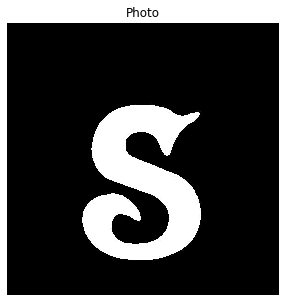

In [3]:
image = cv2.imread("Images/S.jpg",0)

# Display the image

plt.figure(figsize=(5,5))
plt.title('Photo')
plt.axis("off")
implot = plt.imshow(image , cmap = "gray" , vmin = 0 , vmax = 255)

## a.	 Erosion

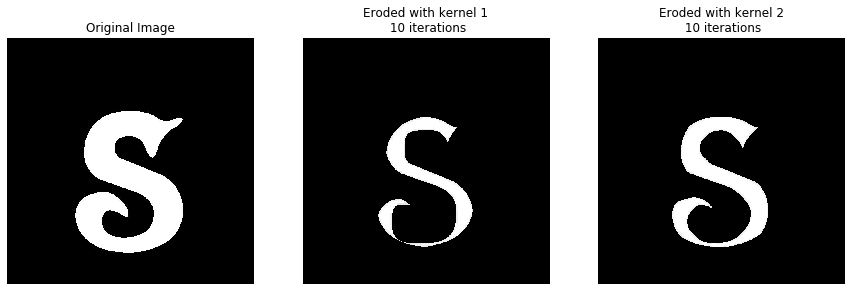

In [4]:
erosion = cv2.erode(image,kernel1,iterations = 10)
erosion1 = cv2.erode(image,kernel2,iterations = 10)

# Display the image

plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.axis("off")
imgplot1 = plt.imshow(image ,cmap='gray', vmin=0, vmax=255)


plt.subplot(1, 3, 2)
plt.title('Eroded with kernel 1\n 10 iterations')
plt.axis("off")
imgplot2 = plt.imshow(erosion,cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 3)
plt.title('Eroded with kernel 2\n 10 iterations')
plt.axis("off")
imgplot3 = plt.imshow(erosion1,cmap='gray', vmin=0, vmax=255)

## b.	Dilation

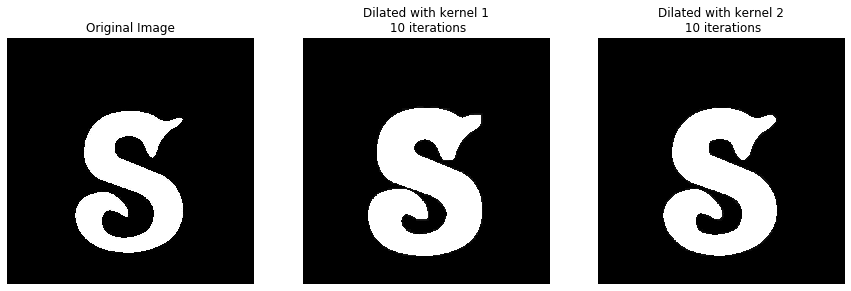

In [5]:
dilation = cv2.dilate(image,kernel1,iterations = 5)
dilation1 = cv2.dilate(image,kernel2,iterations = 5)


# Display the image

plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.axis("off")
imgplot1 = plt.imshow(image ,cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3, 2)
plt.title('Dilated with kernel 1\n 10 iterations')
plt.axis("off")
imgplot2 = plt.imshow(dilation ,cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 3)
plt.title('Dilated with kernel 2\n 10 iterations')
plt.axis("off")
imgplot3 = plt.imshow(dilation1,cmap='gray', vmin=0, vmax=255)

## c.	Opening

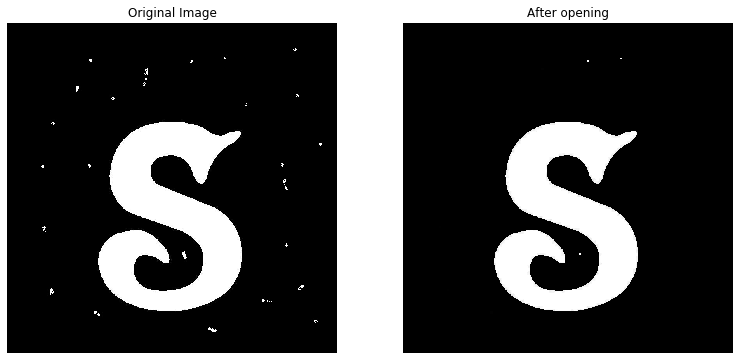

In [6]:
noisybg = cv2.imread("Images/S-noisybg.jpg",0)
opening = cv2.morphologyEx(noisybg, cv2.MORPH_OPEN, kernel1)


# Display the image

plt.figure(figsize=(13,13))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.axis("off")
imgplot1 = plt.imshow(noisybg ,cmap='gray', vmin=0, vmax=255)


plt.subplot(1, 2, 2)
plt.title('After opening')
plt.axis("off")
imgplot2 = plt.imshow(opening ,cmap='gray', vmin=0, vmax=255)

## d.	Closing

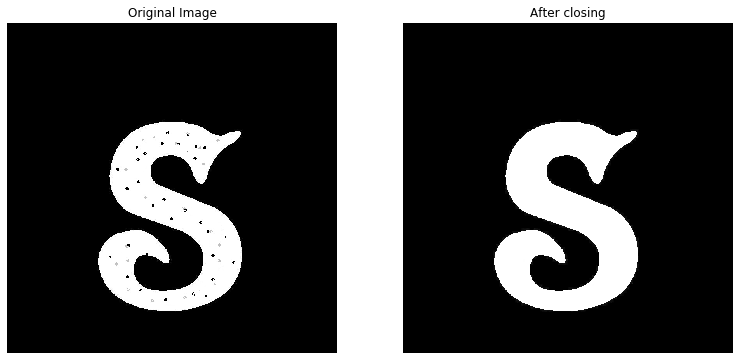

In [7]:
noisyfg = cv2.imread("Images/S-noisyfg.jpg",0)
closing = cv2.morphologyEx(noisyfg, cv2.MORPH_CLOSE, kernel1)

# Display the image

plt.figure(figsize=(13,13))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.axis("off")
imgplot1 = plt.imshow(noisyfg ,cmap='gray', vmin=0, vmax=255)


plt.subplot(1, 2, 2)
plt.title('After closing')
plt.axis("off")
imgplot2 = plt.imshow(closing ,cmap='gray', vmin=0, vmax=255)

## e.	Thickening

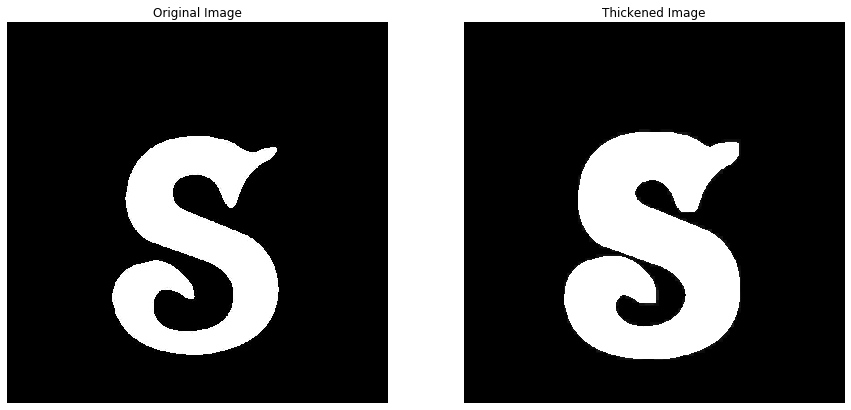

In [8]:
thick = cv2.dilate(image,kernel1,iterations = 5)

# Display the image

plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.axis("off")
imgplot1 = plt.imshow(image ,cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2, 2)
plt.title('Thickened Image')
plt.axis("off")
imgplot2 = plt.imshow(thick ,cmap='gray', vmin=0, vmax=255)

## f.	Thinning

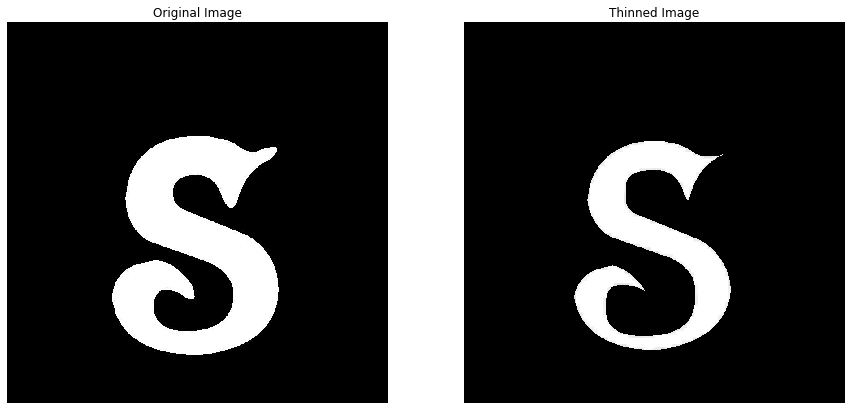

In [9]:
thin = cv2.erode(image,kernel1,iterations = 5)

# Display the image

plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.axis("off")
imgplot1 = plt.imshow(image ,cmap='gray', vmin=0, vmax=255)


plt.subplot(1, 2, 2) 
plt.title('Thinned Image')
plt.axis("off")
imgplot1 = plt.imshow(thin ,cmap='gray', vmin=0, vmax=255)

## g.	Skeletonization

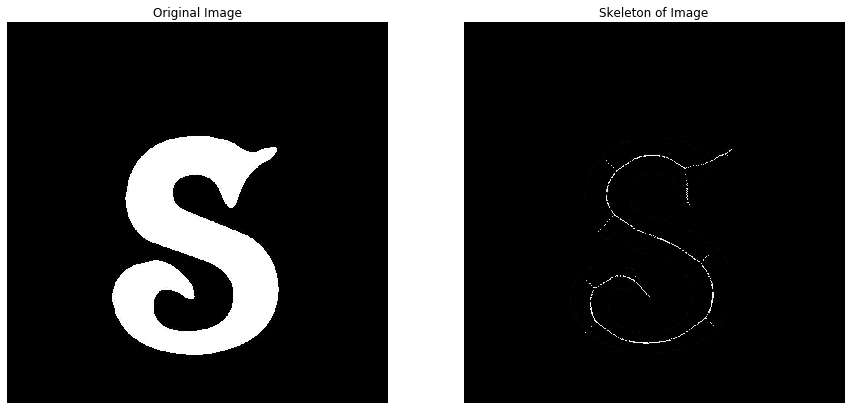

In [10]:
skel = np.zeros(image.shape,dtype='uint8')
img = image.copy()
 

while (cv2.countNonZero(img)!=0):

    erode = cv2.erode(img,kernel4)

    opening = cv2.morphologyEx(erode,cv2.MORPH_OPEN,kernel4)

    subset = erode - opening

    skel = cv2.bitwise_or(subset,skel)     # Union of all previous sets

    img = erode.copy()
    
# Display the image

plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.axis("off")
imgplot1 = plt.imshow(image ,cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2) 
plt.title('Skeleton of Image')
plt.axis("off")
imgplot1 = plt.imshow(skel ,cmap='gray', vmin=0, vmax=255)

## h.	Boundary of an image

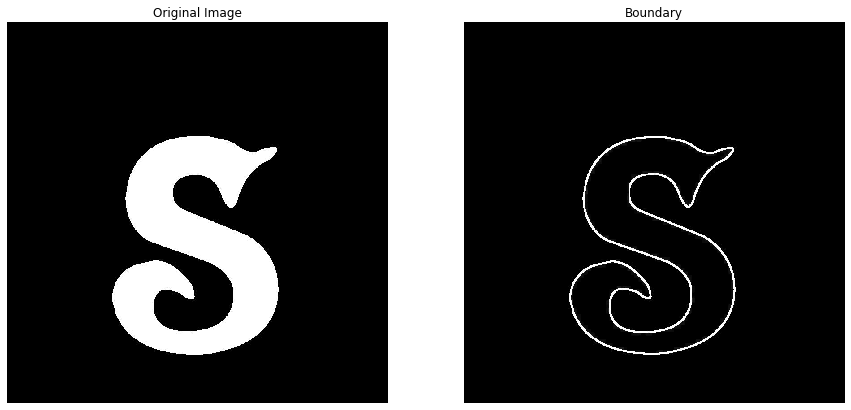

In [11]:


Eroded = cv2.erode(image , kernel1 , iterations = 2 ) #eroding image

boundary_image = cv2.subtract(image , Eroded)   #extracting boundary         

# Display the image

plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1) 
plt.title('Original Image')
plt.axis("off")
imgplot1 = plt.imshow(image ,cmap='gray', vmin=0, vmax=255)


plt.subplot(1, 2, 2)
plt.title('Boundary')
plt.axis("off")
imgplot2 = plt.imshow(boundary_image ,cmap='gray', vmin=0, vmax=255)